คำถาม

- จำนวนผู้เข้าร่วมจัดร้านค้าในกรุงเทพมหานครและปริมณฑล ที่มีความสนใจจะมาร่วมจัดงานในครั้งต่อไป


- เปรียบเทียบจำนวนคนที่มาแน่นอน กับคนที่ไม่แน่ใจและไม่มา ซึ่งเป็นผู้ประเมิณที่ขายสินค้าในงาน ที่ให้คะแนนการประเมิณ 4 ทุกหัวข้อ  


- เจ้าของกิจการกับพนักงานขายมีความพึงพอใจและปัญหา ต่างกันกันอย่างไร

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [4]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [5]:
market = pd.read_csv('/content/drive/Shared drives/G18/G18.csv',na_values=['ไม่มีข้อมูล','-'],keep_default_na=0, sep=',')
print(type(market))
market.tail(5)


<class 'pandas.core.frame.DataFrame'>


,จังหวัด,ประเภทผู้ประเมิน,วันที่เริ่มจำหน่าย,วันที่สิ้นสุดการจำหน่าย,บริเวณพื้นที่,ท่านจำหน่ายสินค้าประเภทใด,bf1,bf2,bf3,bf4,bt5,bt6,bt7,bt8,bt9,bt10,หากมีการจัดงานของสุขสยามท่านจะมาร่วมงานอีกหรือไม่,ข้อเสนออื่นๆ,ลงวันที่ประเมิน
253,อุบลราชธานี,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/8/2020
254,สระบุรี,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/8/2020
255,นนทบุรี​,เจ้าของกิจการ,8/3/2020,8/13/2020,ภาคอีสาน,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,3,มาแน่นอน ไม่ว่าเงื่อนไขใดๆ,,8/5/2020
256,นนทบุรี,พนักงานขาย,8/3/2020,8/13/2020,ภาคกลาง,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,2,3,4,4,3,ไม่แน่ใจ,,8/4/2020
257,สมุทรปราการ,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 2,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน ไม่ว่าเงื่อนไขใดๆ,,8/4/2020


In [6]:
market.isnull().any()

จังหวัด                                              False
ประเภทผู้ประเมิน                                     False
วันที่เริ่มจำหน่าย                                   False
วันที่สิ้นสุดการจำหน่าย                              False
บริเวณพื้นที่                                        False
ท่านจำหน่ายสินค้าประเภทใด                            False
bf1                                                  False
bf2                                                  False
bf3                                                  False
bf4                                                  False
bt5                                                  False
bt6                                                  False
bt7                                                  False
bt8                                                  False
bt9                                                  False
bt10                                                 False
หากมีการจัดงานของสุขสยามท่านจะมาร่วมงานอีกหรือไม่    Fal

In [7]:
market['จังหวัด'].replace({
        'กทม':'กรุงเทพมหานคร',
        'กทท':'กรุงเทพมหานคร',
        'กรุงเทพ':'กรุงเทพมหานคร',
        'กรุงเทพฯ':'กรุงเทพมหานคร',
        'นนทบุรี​':'นนทบุรี',
        
    }, inplace=True)


In [8]:
realm = market.จังหวัด.value_counts()
realm   

กรุงเทพมหานคร      93
ปราจีนบุรี         19
ร้อยเอ็ด           15
สงขลา              11
พัทลุง              8
เชียงใหม่           8
จันทบุรี            6
ปทุมธานี            6
สระแก้ว             5
ลำปาง               5
ขอนแก่น             5
นนทบุรี             5
ชลบุรี              5
นครปฐม              5
ระยอง               5
สมุทรปราการ         5
อุบลราชธานี         4
สมุทรสาคร           4
สระบุรี             3
สกลนคร              3
เชียงราย            3
นครราชศรีมา         3
ประจวบคีรีขันธ์     3
มุกดาหาร            3
อำนาจเจริญ          3
แพร่                2
พะเยา               2
นครราชสีมา          2
สุรินทร์            2
ราชบุรี             2
กาฬสินธุ์           1
ระยอฝ               1
ชัยภูมิ             1
พิจิตร              1
นครนายก             1
แม่ฮองสอน           1
จ.เชียงใหม่         1
ภูเก็ต              1
เขียงใหม่           1
อยุธยา              1
นครศรีธรรมราช       1
ยโสธร               1
ลำพูน               1
Name: จังหวัด, dtype: int64

# จำนวนผู้เข้าร่วมจัดร้านค้าในกรุงเทพมหานครและปริมณฑล ที่มีความสนใจจะมาร่วมจัดงานในครั้งต่อไป

In [9]:
region = 'กรุงเทพมหานคร|นนทบุรี|ปทุมธานี|นครปฐม|สมุทรปราการ|สมุทรสาคร'
come = 'มาแน่นอน'

mask1 = market['จังหวัด'].str.contains(region)
mask2 = market['หากมีการจัดงานของสุขสยามท่านจะมาร่วมงานอีกหรือไม่'].str.contains(come) 


region_c = market[mask1 & mask2 ]
region_c .tail(10)



,จังหวัด,ประเภทผู้ประเมิน,วันที่เริ่มจำหน่าย,วันที่สิ้นสุดการจำหน่าย,บริเวณพื้นที่,ท่านจำหน่ายสินค้าประเภทใด,bf1,bf2,bf3,bf4,bt5,bt6,bt7,bt8,bt9,bt10,หากมีการจัดงานของสุขสยามท่านจะมาร่วมงานอีกหรือไม่,ข้อเสนออื่นๆ,ลงวันที่ประเมิน
227,กรุงเทพมหานคร,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 2,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/9/2020
228,นนทบุรี,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 2,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/9/2020
241,กรุงเทพมหานคร,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/8/2020
242,กรุงเทพมหานคร,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 2,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/8/2020
244,นครปฐม,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/8/2020
246,สมุทรปราการ,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/8/2020
248,ปทุมธานี,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/8/2020
252,กรุงเทพมหานคร,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/7/2020
255,นนทบุรี,เจ้าของกิจการ,8/3/2020,8/13/2020,ภาคอีสาน,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,3,มาแน่นอน ไม่ว่าเงื่อนไขใดๆ,,8/5/2020
257,สมุทรปราการ,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 2,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน ไม่ว่าเงื่อนไขใดๆ,,8/4/2020


In [10]:
realm  = region_c.จังหวัด.value_counts()
realm                        

กรุงเทพมหานคร    34
ปทุมธานี          6
นครปฐม            5
สมุทรปราการ       5
นนทบุรี           4
สมุทรสาคร         2
Name: จังหวัด, dtype: int64

In [11]:
sphere = pd.DataFrame(realm)
sphere

,จังหวัด
กรุงเทพมหานคร,34
ปทุมธานี,6
นครปฐม,5
สมุทรปราการ,5
นนทบุรี,4
สมุทรสาคร,2


In [13]:
sphere.columns

Index(['จังหวัด'], dtype='object')

In [14]:
sphere.rename(columns={'จังหวัด':'Number'},inplace=True)

sphere['Province'] = ['กรุงเทพมหานคร','ปทุมธานี','สมุทรปราการ','นครปฐม','นนทบุรี','สมุทรสาคร' ]
sphere

,Number,Province
กรุงเทพมหานคร,34,กรุงเทพมหานคร
ปทุมธานี,6,ปทุมธานี
นครปฐม,5,สมุทรปราการ
สมุทรปราการ,5,นครปฐม
นนทบุรี,4,นนทบุรี
สมุทรสาคร,2,สมุทรสาคร


Text(0.5, 1.0, 'จำนวนคนที่มาแน่นอน กับคนที่ไม่แน่ใจและไม่มาซึ่งเป็นผู้ประเมิณที่ขายสินค้าในงาน ที่ให้คะแนนการประเมิณ 4 ทุกหัวข้อ')

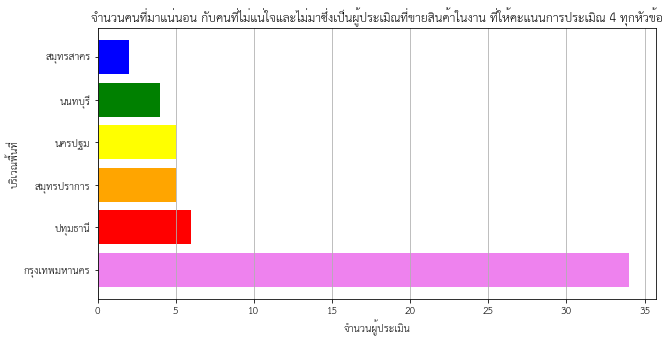

In [15]:
fig, axes = plt.subplots(figsize = (10,5))
axes.barh(sphere['Province'], sphere['Number'], color = ['violet','red', 'orange', 'yellow', 'green','blue'])
axes.grid(axis='x')
axes.set_ylabel('บริเวณพื้นที่')
axes.set_xlabel('จำนวนผู้ประเมิน')
axes.set_title('จำนวนคนที่มาแน่นอน กับคนที่ไม่แน่ใจและไม่มาซึ่งเป็นผู้ประเมิณที่ขายสินค้าในงาน ที่ให้คะแนนการประเมิณ 4 ทุกหัวข้อ')

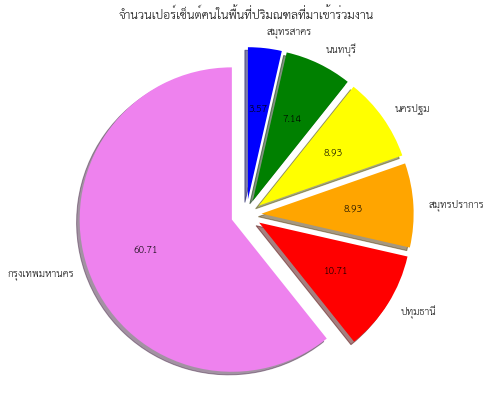

In [ ]:
sphere_c = sphere['Province']
sphere_n = sphere['Number'] 
colors=[ 'violet','red', 'orange', 'yellow', 'green','blue']
 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(sphere_n, labels = sphere_c ,colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1) , autopct='%.2f' ) 
plt.title('จำนวนเปอร์เซ็นต์คนในพื้นที่ปริมณฑลที่มาเข้าร่วมงาน')  
plt.show() 

# เปรียบเทียบจำนวนคนที่มาแน่นอน กับคนที่ไม่แน่ใจและไม่มาซึ่งเป็นผู้ประเมิณที่ขายสินค้าในงาน ที่ให้คะแนนการประเมิณ 4 ทุกหัวข้อ





In [16]:
condition_1 = market['bf1'].isin([4])
condition_2 = market['bf2'].isin([4])
condition_3 = market['bf3'].isin([4])
condition_4 = market['bf4'].isin([4])
condition_5 = market['bt5'].isin([4])
condition_6 = market['bt6'].isin([4])
condition_7 = market['bt7'].isin([4])
condition_8 = market['bt8'].isin([4])
condition_9 = market['bt9'].isin([4])
condition_10 = market['bt10'].isin([4])
market_4 = market[(condition_1) & (condition_2)& (condition_3)& (condition_4)& (condition_5)& (condition_6)& (condition_7)& (condition_8)& (condition_9)& (condition_10)]
market_4

,จังหวัด,ประเภทผู้ประเมิน,วันที่เริ่มจำหน่าย,วันที่สิ้นสุดการจำหน่าย,บริเวณพื้นที่,ท่านจำหน่ายสินค้าประเภทใด,bf1,bf2,bf3,bf4,bt5,bt6,bt7,bt8,bt9,bt10,หากมีการจัดงานของสุขสยามท่านจะมาร่วมงานอีกหรือไม่,ข้อเสนออื่นๆ,ลงวันที่ประเมิน
0,ลำปาง,เจ้าของกิจการ,8/1/2020,9/30/2020,ภาคเหนือ,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน ไม่ว่าเงื่อนไขใดๆ,,9/1/2020
1,เชียงใหม่,เจ้าของกิจการ,8/1/2020,8/31/2020,ภาคเหนือ,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน ไม่ว่าเงื่อนไขใดๆ,พนักงานทุกท่าน ช่วยเหลือดีมาก ประทับใจในการช่...,8/31/2020
2,จ.เชียงใหม่,เจ้าของกิจการ,8/1/2020,8/31/2020,ภาคเหนือ,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน ไม่ว่าเงื่อนไขใดๆ,ไม่มี,8/31/2020
23,เชียงใหม่,เจ้าของกิจการ,8/1/2020,8/31/2020,ภาคเหนือ,Food (อาหารคาว/หวาน/ผลไม้/เครื่องดื่ม),4,4,4,4,4,4,4,4,4,4,มาแน่นอน ไม่ว่าเงื่อนไขใดๆ,,8/31/2020
50,อำนาจเจริญ,เจ้าของกิจการ,8/28/2020,8/30/2020,ภาคอีสาน,Food (อาหารคาว/หวาน/ผลไม้/เครื่องดื่ม),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/30/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,อุบลราชธานี,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/7/2020
252,กรุงเทพมหานคร,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/7/2020
253,อุบลราชธานี,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/8/2020
254,สระบุรี,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/8/2020


In [19]:
place = 'ลานเมือง 1|ลานเมือง 2|ภาคเหนือ|ภาคอีสาน|ภาคกลาง'
come = 'มาแน่นอน'

mask1 = market_4['บริเวณพื้นที่'].str.contains(place)
mask2 = market_4['หากมีการจัดงานของสุขสยามท่านจะมาร่วมงานอีกหรือไม่'].str.contains(come) 

area_1 = market_4[mask1 & mask2 ]
area_1.tail(10)


,จังหวัด,ประเภทผู้ประเมิน,วันที่เริ่มจำหน่าย,วันที่สิ้นสุดการจำหน่าย,บริเวณพื้นที่,ท่านจำหน่ายสินค้าประเภทใด,bf1,bf2,bf3,bf4,bt5,bt6,bt7,bt8,bt9,bt10,หากมีการจัดงานของสุขสยามท่านจะมาร่วมงานอีกหรือไม่,ข้อเสนออื่นๆ,ลงวันที่ประเมิน
241,กรุงเทพมหานคร,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/8/2020
242,กรุงเทพมหานคร,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 2,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/8/2020
243,ยโสธร,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 2,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/8/2020
244,นครปฐม,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/8/2020
246,สมุทรปราการ,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/8/2020
247,สระบุรี,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/8/2020
248,ปทุมธานี,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/8/2020
252,กรุงเทพมหานคร,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/7/2020
253,อุบลราชธานี,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/8/2020
257,สมุทรปราการ,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 2,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน ไม่ว่าเงื่อนไขใดๆ,,8/4/2020


In [20]:
site = area_1.บริเวณพื้นที่.value_counts()
site  

ลานเมือง 2    26
ลานเมือง 1    20
ภาคอีสาน       6
ภาคเหนือ       4
Name: บริเวณพื้นที่, dtype: int64

In [21]:
area_c = pd.DataFrame(site)
area_c

,บริเวณพื้นที่
ลานเมือง 2,26
ลานเมือง 1,20
ภาคอีสาน,6
ภาคเหนือ,4


In [22]:
place = 'ลานเมือง 1|ลานเมือง 2|ภาคเหนือ|ภาคอีสาน|ภาคกลาง'
nsure = 'ไม่แน่ใจ'

mask1 = market_4['บริเวณพื้นที่'].str.contains(place)
mask2 = market_4['หากมีการจัดงานของสุขสยามท่านจะมาร่วมงานอีกหรือไม่'].str.contains(nsure) 


area_2 = market_4[mask1 & mask2 ]
area_2.tail(10)


,จังหวัด,ประเภทผู้ประเมิน,วันที่เริ่มจำหน่าย,วันที่สิ้นสุดการจำหน่าย,บริเวณพื้นที่,ท่านจำหน่ายสินค้าประเภทใด,bf1,bf2,bf3,bf4,bt5,bt6,bt7,bt8,bt9,bt10,หากมีการจัดงานของสุขสยามท่านจะมาร่วมงานอีกหรือไม่,ข้อเสนออื่นๆ,ลงวันที่ประเมิน
203,สระแก้ว,เจ้าของกิจการ,8/13/2020,8/17/2020,ลานเมือง 2,Food (อาหารคาว/หวาน/ผลไม้/เครื่องดื่ม),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/16/2020
206,ปราจีนบุรี,เจ้าของกิจการ,8/13/2020,8/17/2020,ลานเมือง 2,Food (อาหารคาว/หวาน/ผลไม้/เครื่องดื่ม),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/16/2020
207,ปราจีนบุรี,เจ้าของกิจการ,8/13/2020,8/17/2020,ลานเมือง 2,Food (อาหารคาว/หวาน/ผลไม้/เครื่องดื่ม),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/16/2020
209,ปราจีนบุรี,เจ้าของกิจการ,8/13/2020,8/17/2020,ลานเมือง 2,Food (อาหารคาว/หวาน/ผลไม้/เครื่องดื่ม),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/16/2020
224,จันทบุรี,เจ้าของกิจการ,8/13/2020,8/17/2020,ลานเมือง 2,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/16/2020
235,พะเยา,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 2,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/9/2020
245,ขอนแก่น,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/8/2020
249,สมุทรสาคร,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/8/2020
251,อุบลราชธานี,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/7/2020
254,สระบุรี,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/8/2020


In [23]:
ns_site = area_2.บริเวณพื้นที่.value_counts()
ns_site 

ลานเมือง 1    69
ลานเมือง 2     8
Name: บริเวณพื้นที่, dtype: int64

In [24]:
area_ns = pd.DataFrame(ns_site)
area_ns

,บริเวณพื้นที่
ลานเมือง 1,69
ลานเมือง 2,8


In [25]:
place = 'ลานเมือง 1|ลานเมือง 2|ภาคเหนือ|ภาคอีสาน|ภาคกลาง'
ncome = 'ไม่มา'

mask1 = market_4['บริเวณพื้นที่'].str.contains(place)
mask2 = market_4['หากมีการจัดงานของสุขสยามท่านจะมาร่วมงานอีกหรือไม่'].str.contains(ncome) 


area_3 = market_4[mask1 & mask2 ]
area_3.tail(10)


,จังหวัด,ประเภทผู้ประเมิน,วันที่เริ่มจำหน่าย,วันที่สิ้นสุดการจำหน่าย,บริเวณพื้นที่,ท่านจำหน่ายสินค้าประเภทใด,bf1,bf2,bf3,bf4,bt5,bt6,bt7,bt8,bt9,bt10,หากมีการจัดงานของสุขสยามท่านจะมาร่วมงานอีกหรือไม่,ข้อเสนออื่นๆ,ลงวันที่ประเมิน
141,กรุงเทพมหานคร,พนักงานขาย,8/20/2020,8/22/2020,ลานเมือง 1,Food (อาหารคาว/หวาน/ผลไม้/เครื่องดื่ม),4,4,4,4,4,4,4,4,4,4,ไม่มา,,8/22/2020
147,กรุงเทพมหานคร,เจ้าของกิจการ,8/20/2020,8/22/2020,ลานเมือง 1,Food (อาหารคาว/หวาน/ผลไม้/เครื่องดื่ม),4,4,4,4,4,4,4,4,4,4,ไม่มา,,8/22/2020
185,กรุงเทพมหานคร,พนักงานขาย,8/20/2020,8/22/2020,ลานเมือง 1,Food (อาหารคาว/หวาน/ผลไม้/เครื่องดื่ม),4,4,4,4,4,4,4,4,4,4,ไม่มา,,8/22/2020


In [26]:
nc_site = area_3.บริเวณพื้นที่.value_counts()
nc_site 

ลานเมือง 1    3
Name: บริเวณพื้นที่, dtype: int64

In [27]:
area_nc = pd.DataFrame(nc_site)
area_nc

,บริเวณพื้นที่
ลานเมือง 1,3


In [28]:
area_c.rename(columns={'บริเวณพื้นที่':'มาแน่นอน'},inplace=True)
area_ns.rename(columns={'บริเวณพื้นที่':'ไม่แน่ใจ'},inplace=True)
area_nc.rename(columns={'บริเวณพื้นที่':'ไม่มา'},inplace=True)


In [29]:
point = pd.concat([area_c,area_ns, area_nc], axis=1)
point['Area'] = ['ลานเมือง 2','ลานเมือง 1','ภาคอีสาน','ภาคเหนือ' ]
point.fillna('0')



,มาแน่นอน,ไม่แน่ใจ,ไม่มา,Area
ลานเมือง 2,26,8,0,ลานเมือง 2
ลานเมือง 1,20,69,3,ลานเมือง 1
ภาคอีสาน,6,0,0,ภาคอีสาน
ภาคเหนือ,4,0,0,ภาคเหนือ


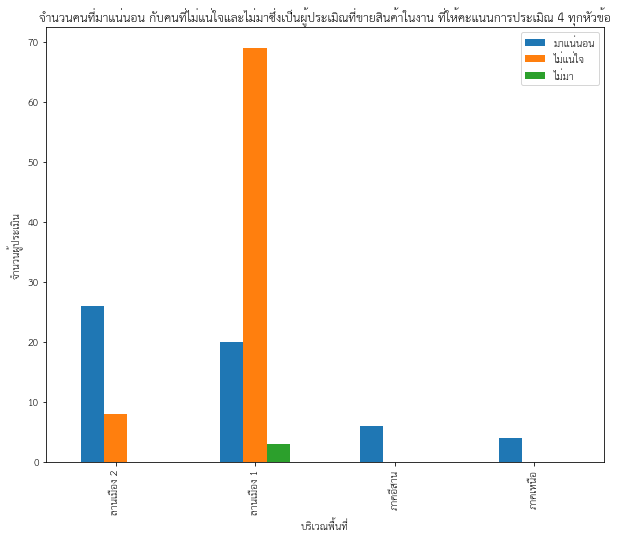

In [30]:
point.plot.bar(figsize=(10,8))
plt.xlabel('บริเวณพื้นที่')
plt.ylabel('จำนวนผู้ประเมิน')
plt.title('จำนวนคนที่มาแน่นอน กับคนที่ไม่แน่ใจและไม่มาซึ่งเป็นผู้ประเมิณที่ขายสินค้าในงาน ที่ให้คะแนนการประเมิณ 4 ทุกหัวข้อ')
plt.show()

# ค่าเฉลี่ยคะแนนความพึงพอใจเจ้าของกิจการกับพนักงานขายมีต่อการจัดงานครั้งนี้

In [31]:
Assessor = market.ประเภทผู้ประเมิน.value_counts()
Assessor

เจ้าของกิจการ    194
พนักงานขาย        64
Name: ประเภทผู้ประเมิน, dtype: int64

In [32]:
owner = market['ประเภทผู้ประเมิน'].str.contains('เจ้าของกิจการ') 

table1 = market[owner]
table1.tail(10)

,จังหวัด,ประเภทผู้ประเมิน,วันที่เริ่มจำหน่าย,วันที่สิ้นสุดการจำหน่าย,บริเวณพื้นที่,ท่านจำหน่ายสินค้าประเภทใด,bf1,bf2,bf3,bf4,bt5,bt6,bt7,bt8,bt9,bt10,หากมีการจัดงานของสุขสยามท่านจะมาร่วมงานอีกหรือไม่,ข้อเสนออื่นๆ,ลงวันที่ประเมิน
247,สระบุรี,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/8/2020
248,ปทุมธานี,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/8/2020
249,สมุทรสาคร,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/8/2020
250,พะเยา,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,3,2,4,3,4,3,4,3,ไม่แน่ใจ,,8/8/2020
251,อุบลราชธานี,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/7/2020
252,กรุงเทพมหานคร,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/7/2020
253,อุบลราชธานี,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/8/2020
254,สระบุรี,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 1,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/8/2020
255,นนทบุรี,เจ้าของกิจการ,8/3/2020,8/13/2020,ภาคอีสาน,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,3,มาแน่นอน ไม่ว่าเงื่อนไขใดๆ,,8/5/2020
257,สมุทรปราการ,เจ้าของกิจการ,8/3/2020,8/12/2020,ลานเมือง 2,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,4,4,4,4,4,มาแน่นอน ไม่ว่าเงื่อนไขใดๆ,,8/4/2020


In [33]:
product_f = table1['ท่านจำหน่ายสินค้าประเภทใด'].value_counts()
product_f

Food (อาหารคาว/หวาน/ผลไม้/เครื่องดื่ม)    137
Non Food (งานหัตถกรรม/งานหัตถศิลป์)        57
Name: ท่านจำหน่ายสินค้าประเภทใด, dtype: int64

In [34]:
owner_f = table1['ท่านจำหน่ายสินค้าประเภทใด'].str.contains('ผลไม้') 

owner_food = table1[owner_f]
#table1_food.tail(5)

avgf_table = owner_food.mean()
#avgf_table = table1_food.mean()
avgf_table1 = pd.DataFrame(avgf_table)
avgf_table1.rename(columns={0:'Owner_food'},inplace=True)
avgf_table1

,Owner_food
bf1,3.401460
bf2,3.357664
bf3,3.401460
bf4,3.386861
bt5,3.379562
bt6,3.335766
bt7,3.357664
bt8,3.401460
bt9,3.379562
bt10,3.364964


In [35]:
avg_table = table1.mean()
avg_table1 = pd.DataFrame(avg_table)
avg_table1.rename(columns={0:'Owner'},inplace=True)
avg_table1

,Owner
bf1,3.530928
bf2,3.489691
bf3,3.505155
bf4,3.520619
bt5,3.469072
bt6,3.443299
bt7,3.458763
bt8,3.525773
bt9,3.505155
bt10,3.448454


In [36]:
owner_nf = table1['ท่านจำหน่ายสินค้าประเภทใด'].str.contains('งานหัตถกรรม') 

owner_nonfood = table1[owner_nf]
#table1_food.tail(5)

avgnf_table = owner_nonfood.mean()
#avgf_table = table1_food.mean()
avgnf_table1 = pd.DataFrame(avgnf_table)
avgnf_table1.rename(columns={0:'Owner_nonfood'},inplace=True)
avgnf_table1

,Owner_nonfood
bf1,3.842105
bf2,3.807018
bf3,3.754386
bf4,3.842105
bt5,3.684211
bt6,3.701754
bt7,3.701754
bt8,3.824561
bt9,3.807018
bt10,3.649123


In [37]:
sales = market['ประเภทผู้ประเมิน'].str.contains('พนักงานขาย') 

table2 = market[sales]
table2.tail(10)

,จังหวัด,ประเภทผู้ประเมิน,วันที่เริ่มจำหน่าย,วันที่สิ้นสุดการจำหน่าย,บริเวณพื้นที่,ท่านจำหน่ายสินค้าประเภทใด,bf1,bf2,bf3,bf4,bt5,bt6,bt7,bt8,bt9,bt10,หากมีการจัดงานของสุขสยามท่านจะมาร่วมงานอีกหรือไม่,ข้อเสนออื่นๆ,ลงวันที่ประเมิน
181,กรุงเทพมหานคร,พนักงานขาย,8/20/2020,8/22/2020,ลานเมือง 1,Food (อาหารคาว/หวาน/ผลไม้/เครื่องดื่ม),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/22/2020
182,กรุงเทพมหานคร,พนักงานขาย,8/20/2020,8/22/2020,ลานเมือง 1,Food (อาหารคาว/หวาน/ผลไม้/เครื่องดื่ม),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/22/2020
183,กรุงเทพมหานคร,พนักงานขาย,8/20/2020,8/22/2020,ลานเมือง 1,Food (อาหารคาว/หวาน/ผลไม้/เครื่องดื่ม),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/22/2020
184,กรุงเทพมหานคร,พนักงานขาย,8/20/2020,8/22/2020,ลานเมือง 1,Food (อาหารคาว/หวาน/ผลไม้/เครื่องดื่ม),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/22/2020
185,กรุงเทพมหานคร,พนักงานขาย,8/20/2020,8/22/2020,ลานเมือง 1,Food (อาหารคาว/หวาน/ผลไม้/เครื่องดื่ม),4,4,4,4,4,4,4,4,4,4,ไม่มา,,8/22/2020
186,กรุงเทพมหานคร,พนักงานขาย,8/20/2020,8/22/2020,ลานเมือง 1,Food (อาหารคาว/หวาน/ผลไม้/เครื่องดื่ม),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/22/2020
187,กรุงเทพมหานคร,พนักงานขาย,8/20/2020,8/22/2020,ลานเมือง 1,Food (อาหารคาว/หวาน/ผลไม้/เครื่องดื่ม),4,4,4,4,4,4,4,4,4,4,ไม่แน่ใจ,,8/22/2020
189,ลำปาง,พนักงานขาย,8/20/2020,8/22/2020,ลานเมือง 2,Food (อาหารคาว/หวาน/ผลไม้/เครื่องดื่ม),3,4,3,4,3,3,4,3,3,3,มาแน่นอน หากค่าเช่าเหมาะสม,,8/21/2020
213,ชลบุรี,พนักงานขาย,8/13/2020,8/17/2020,ลานเมือง 2,Food (อาหารคาว/หวาน/ผลไม้/เครื่องดื่ม),4,4,4,4,4,4,4,4,4,4,มาแน่นอน หากค่าเช่าเหมาะสม,,8/16/2020
256,นนทบุรี,พนักงานขาย,8/3/2020,8/13/2020,ภาคกลาง,Non Food (งานหัตถกรรม/งานหัตถศิลป์),4,4,4,4,4,2,3,4,4,3,ไม่แน่ใจ,,8/4/2020


In [38]:
product_n = table2['ท่านจำหน่ายสินค้าประเภทใด'].value_counts()
product_n

Food (อาหารคาว/หวาน/ผลไม้/เครื่องดื่ม)    61
Non Food (งานหัตถกรรม/งานหัตถศิลป์)        3
Name: ท่านจำหน่ายสินค้าประเภทใด, dtype: int64

In [39]:
avg_table = table2.mean()
avg_table2 = pd.DataFrame(avg_table)
avg_table2.rename(columns={0:'Sales'},inplace=True)
avg_table2

,Sales
bf1,3.875000
bf2,3.906250
bf3,3.890625
bf4,3.906250
bt5,3.875000
bt6,3.859375
bt7,3.875000
bt8,3.875000
bt9,3.843750
bt10,3.765625


In [40]:
sales_f = table2['ท่านจำหน่ายสินค้าประเภทใด'].str.contains('ผลไม้') 

sales_food = table2[sales_f]

avgf_table2 = sales_food.mean()
avgf_table2 = pd.DataFrame(avgf_table2)
avgf_table2.rename(columns={0:'Sales_food'},inplace=True)
avgf_table2


,Sales_food
bf1,3.885246
bf2,3.918033
bf3,3.901639
bf4,3.918033
bt5,3.901639
bt6,3.901639
bt7,3.918033
bt8,3.901639
bt9,3.868852
bt10,3.803279


In [41]:
sales_nf = table2['ท่านจำหน่ายสินค้าประเภทใด'].str.contains('งานหัตถกรรม') 

sales_nfood = table2[sales_nf]

avgnf_table2 = sales_nfood.mean()
avgnf_table2 = pd.DataFrame(avgnf_table2)
avgnf_table2.rename(columns={0:'Sales_nonfood'},inplace=True)
avgnf_table2

,Sales_nonfood
bf1,3.666667
bf2,3.666667
bf3,3.666667
bf4,3.666667
bt5,3.333333
bt6,3.000000
bt7,3.000000
bt8,3.333333
bt9,3.333333
bt10,3.000000


In [42]:
Avg = pd.concat([avg_table1, avgf_table1, avgnf_table1, avg_table2,avgf_table2,avgnf_table2] , axis=1)
Avg

,Owner,Owner_food,Owner_nonfood,Sales,Sales_food,Sales_nonfood
bf1,3.530928,3.401460,3.842105,3.875000,3.885246,3.666667
bf2,3.489691,3.357664,3.807018,3.906250,3.918033,3.666667
bf3,3.505155,3.401460,3.754386,3.890625,3.901639,3.666667
bf4,3.520619,3.386861,3.842105,3.906250,3.918033,3.666667
bt5,3.469072,3.379562,3.684211,3.875000,3.901639,3.333333
bt6,3.443299,3.335766,3.701754,3.859375,3.901639,3.000000
bt7,3.458763,3.357664,3.701754,3.875000,3.918033,3.000000
bt8,3.525773,3.401460,3.824561,3.875000,3.901639,3.333333
bt9,3.505155,3.379562,3.807018,3.843750,3.868852,3.333333
bt10,3.448454,3.364964,3.649123,3.765625,3.803279,3.000000


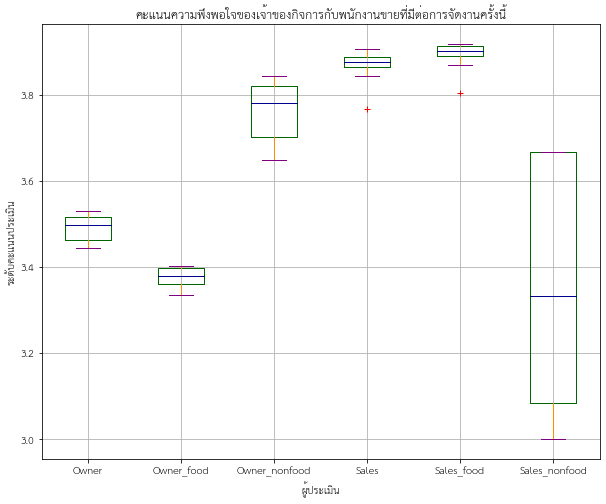

In [43]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'purple'}
Avg.plot.box(figsize=(10,8), grid=True ,color=color, sym='r+')
plt.xlabel('ผู้ประเมิน')
plt.ylabel('ระดับคะแนนประเมิน')
plt.title('คะแนนความพึงพอใจของเจ้าของกิจการกับพนักงานขายที่มีต่อการจัดงานครั้งนี้')
plt.show()

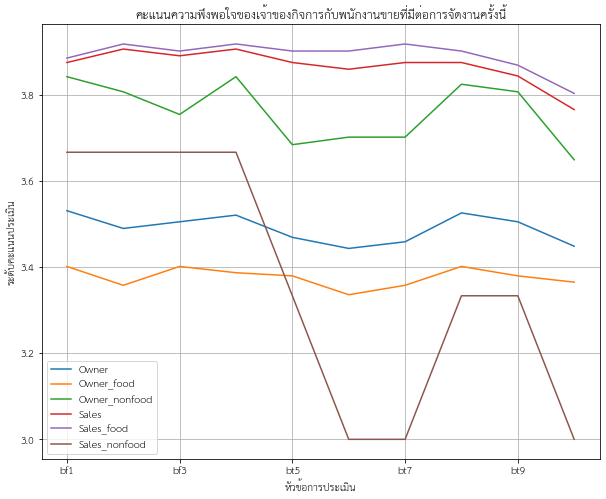

In [44]:
Avg.plot(figsize=(10,8), grid=True)
plt.xlabel('หัวข้อการประเมิน')
plt.ylabel('ระดับคะแนนประเมิน')
plt.title('คะแนนความพึงพอใจของเจ้าของกิจการกับพนักงานขายที่มีต่อการจัดงานครั้งนี้')
plt.show()